In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 定義callback類別來收集訓練數據
class TrainingCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.weights = []
        self.biases = []
        self.losses = []
    
    def on_epoch_end(self, epoch, logs=None):
        self.weights.append(self.model.layers[0].get_weights()[0][0][0])
        self.biases.append(self.model.layers[0].get_weights()[1][0])
        self.losses.append(logs['loss'])

# 建立模型
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])
model.compile(optimizer='sgd', loss='mean_squared_error')

# 準備訓練資料
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]
xs = np.array(x, dtype=float)
ys = np.array(y, dtype=float)

# 建立回調實例
callback = TrainingCallback()

# 訓練模型
history = model.fit(xs, ys, epochs=500, callbacks=[callback])

# 創建圖表
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# 繪製損失值變化
ax1.plot(callback.losses)
ax1.set_title('Change in loss value')# 損失值變化
ax1.set_xlabel('Training Cycle') # 訓練週期
ax1.set_ylabel('loss value') # 損失值
ax1.grid(True)

# 繪製權重和偏差變化
ax2.plot(callback.weights, label='weights')
ax2.plot(callback.biases, label='biases')
ax2.set_title('Changes in weights and biases') # 權重和偏差變化
ax2.set_xlabel('Training Cycle') # 訓練週期
ax2.set_ylabel('numerical value') # 數值
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# 輸出最終結果
print("預測值:", model.predict(np.array([10.0])))
print("最終權重:", l0.get_weights()[0])
print("最終偏差:", l0.get_weights()[1])

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 29.1720
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18.3078
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.6197
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.4994
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.9584
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.3885
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.4159
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.8107
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.4316
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1916
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0374
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9360
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8672
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8187
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7827
Epoch 16/500
1/1

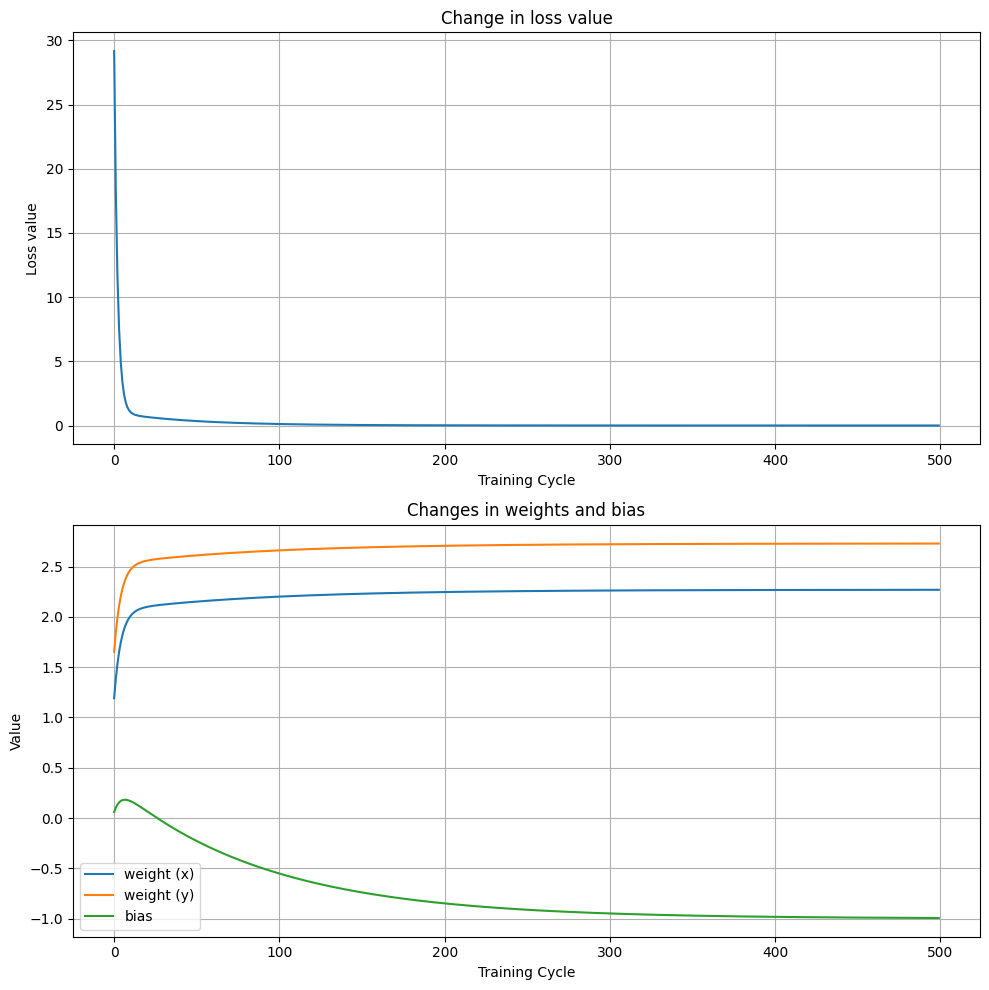

測試輸入: [[2.0, 3.0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
預測值: [[11.7313]]
目標方程式: z = 2x + 3y - 1
最終權重: [[2.2691743]
 [2.7290316]]
最終偏差: [-0.994143]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
實際值: 12.0
預測值: 11.731300354003906
誤差: 0.26869964599609375


/tmp/ipykernel_86130/2803943657.py:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_value = float(model.predict(np.array(test_input)))


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 定義callback類別來收集訓練數據
class TrainingCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.weights1 = []  # 第一個變量的權重
        self.weights2 = []  # 第二個變量的權重
        self.biases = []
        self.losses = []
    
    def on_epoch_end(self, epoch, logs=None):
        weights = self.model.layers[0].get_weights()[0]
        self.weights1.append(weights[0][0])
        self.weights2.append(weights[1][0])
        self.biases.append(self.model.layers[0].get_weights()[1][0])
        self.losses.append(logs['loss'])

# 建立模型 (z = 2x + 3y - 1)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[2])
])
model.compile(optimizer='sgd', loss='mean_squared_error')

# 準備訓練資料
x = [[-1, -1], [0, 0], [1, 1], [2, 2], [3, 3], [4, 4]]
y = [2*(-1) + 3*(-1) - 1, 2*0 + 3*0 - 1, 2*1 + 3*1 - 1, 
     2*2 + 3*2 - 1, 2*3 + 3*3 - 1, 2*4 + 3*4 - 1]
xs = np.array(x, dtype=float)
ys = np.array(y, dtype=float)

# 建立回調實例
callback = TrainingCallback()

# 訓練模型
history = model.fit(xs, ys, epochs=500, callbacks=[callback])

# 創建圖表
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# 繪製損失值變化
ax1.plot(callback.losses)
ax1.set_title('Change in loss value')
ax1.set_xlabel('Training Cycle')
ax1.set_ylabel('Loss value')
ax1.grid(True)

# 繪製權重和偏差變化
ax2.plot(callback.weights1, label='weight (x)')
ax2.plot(callback.weights2, label='weight (y)')
ax2.plot(callback.biases, label='bias')
ax2.set_title('Changes in weights and bias')
ax2.set_xlabel('Training Cycle')
ax2.set_ylabel('Value')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# 輸出最終結果
test_input = [[2.0, 3.0]]  # 測試輸入
print("測試輸入:", test_input)
print("預測值:", model.predict(np.array(test_input)))
print("目標方程式: z = 2x + 3y - 1")
print("最終權重:", model.layers[0].get_weights()[0])
print("最終偏差:", model.layers[0].get_weights()[1])

# 計算預測值與實際值的誤差
actual_value = 2*test_input[0][0] + 3*test_input[0][1] - 1
predicted_value = float(model.predict(np.array(test_input)))
print(f"實際值: {actual_value}")
print(f"預測值: {predicted_value}")
print(f"誤差: {abs(actual_value - predicted_value)}")